In [1]:
!pip install matplotlib==3.5.1 numpy==1.20.2 scipy==1.7.3

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from Tutorial_1_tools import plot_features_and_label,generate_density_plots,generate_decision_region_plots,score_classifier,generate_test_plots,generate_monty_plot

# Tutorial 1 - Probability basics


In this tutorial we introduce the basic mathematical concepts required to understand classification problems.


We will review the following concepts:<br>

    - Sample dimension
    - Sample class
    - Gaussian distribution
    - Multivariate distribution
    - Input distribution
    - Posterior distribution


<strong>Classification</strong> is a very common task in machine learning.
In a classification task, we wish to assign a <strong>label</strong> to <strong>input data samples</strong>.
An input data sample is often represented as a list of <strong>features</strong>, also called a <strong>feature vector</strong>.

To tackle a classification problem, we start with a <strong>dataset</strong> of several input data samples. In supervised classification problems, we get the labels associated with the input data samples.


## 1. Introduction

The purpose of this fisrt tutorial is to introduce some fundamental concepts in probability and classification theory.

Let us assume that you are working on <strong>diagnosising of health disorders</strong> such as blood cancers. For this purpose, you are asked to design an algorithm that <strong>classifies</strong> two types of white blood cell (monocyte and granulocyte) based on their <strong>size</strong> and <strong>shape</strong> (granularity), see figure 1. 

<center><img src="img/monocyte_granulocyte.jpg" ...></center>
      <center> <strong>Fig 1. Monocytes and granulocytes</strong></center>

This is a typical example of <strong>classification problem</strong>. The inputs of your classifier (the size and granularity of a white blood cell) are called the <strong>features</strong>. They are usually represented using a vector <strong>$ x  = (x_1,x_2)$</strong> where <strong>$x_1$</strong> is the size and <strong>$x_2$</strong> the granularity of a given blood cell. Each <strong>feature vector</strong> is associated with a type of white blood cell, either monocyte and granulocyte. This type is called the <strong>label</strong> and is usually denoted by the letter <strong>$y$</strong>. We can choose <strong>$y=0$</strong> as the label for monocyte and <strong>$y=1$</strong> as the label for granulocyte. 

To help you in your task, your colleagues from the lab have measured the size and granularity (the features) of 100 monocyte and 100 granulocyte. The collected data is shown on figure 2. 

<center><img src="img/scatter_plot_units.png" ...></center>
      <center> <strong>Fig 2. Data collected by the lab</strong></center>



### Question 1.  
    - Load the data collected from the lab
    - Use `matplotlib` to display the data in a 2d plot, similar to figure 2.

In [4]:
X_lab = np.load('data/lab_data_features.npy')
Y_lab = np.load('data/lab_data_labels.npy')

X_test = np.load('data/lab_test_features.npy')
Y_test = np.load('data/lab_test_labels.npy')

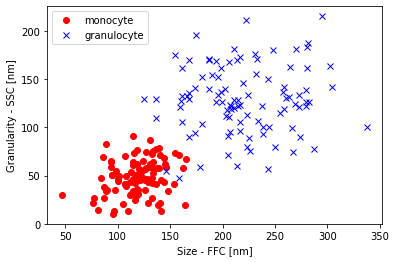

In [5]:
X_0_lab = X_lab[(Y_lab == 0 ),:]
X_1_lab = X_lab[(Y_lab == 1 ),:]

plot_features_and_label(X_0_lab,X_1_lab)

## 2. The Maximum A Posteriori classifier

      
Your task is to create a binary classifier, a function, that takes as inputs the size and granularity of a new white blood cell and to classify it, to guess if it is a monocyte or a granulocyte (see figure 3). 

<center><img src="img/classifier_example.png" ...></center>
      <center> <strong>Fig 3. Classifier example</strong></center>
      
The classification operation can be mathematically
defined as a scalar discrete-valued function of the observed feature
vector, as
<center>$\begin{equation}d(x) = \begin{cases}0, \iff \text{Classify as monocyte} \\1, \iff \text{Classify as granulocyte} \end{cases} \end{equation}$</center> <div style="text-align: right"> (1) </div>

### How can we implement a machine version of this binary classifier? 

Later theoretical analysis will show that a good method is to first calculate a function value $d(x)$ that is somehow related to the degree of probability that a monocyte (or granulocyte) caused the observed feature vector. 
<center>$\begin{equation}d(x) = \begin{cases}0, \iff \text{monocyte is more probable than granulocyte}  \\1, \iff \text{granulocyte  is more probable than monocyte}   \end{cases} \end{equation}$</center> <div style="text-align: right"> (2) </div>
The maximum a posteriori (MAP) binary classifier suggest to compare the conditional probability of observing the feature $x$ if it was caused by a monocyte and if it was caused by a granulocyte. Mathematically, the MAP binary classifier can be written as: 
<center>$\begin{equation}d_{MAP}(x) = \begin{cases}0, \iff P(x|y=0) > P(x|y=1)  \\1 \iff P(x|y=0) < P(x|y=1)  \end{cases} \end{equation}$</center> <div style="text-align: right"> (3) </div>


### How do we compute the probabilities $P(x|y=0)$ and $P(x|y=1)$ ?

We will assume that the size and granularity of a white blood cell can be modelled as a **multivariate Gaussian variable**. That is, we will assume that the size and granularity of a monocyte can be modelled as a Gaussian distributed variable with mean $\mu_0$ and variance $C_0$ and that the size and granularity of a granulocyte can be modelled as a Gaussian distributed variable with mean $\mu_1$ and variance $C_1$.

The respective probabilities for a monocyte and granulocyte to have a feature vector $x$ is given by the following equations:
<center>$\begin{align} 
P(X = x|y=0) = \frac{1}{2 \pi \sqrt{\det(C_0)}}e^{-\frac{1}{2}(x-\mu_0)^T C_0^{-1}(x-\mu_0)},\\
P(X = x|y=1) = \frac{1}{2 \pi \sqrt{\det(C_1)}}e^{-\frac{1}{2}(x-\mu_1)^T C_1^{-1}(x-\mu_1)}.
\end{align}$</center>

If we compute the probabilites of each vector $x$ in the plan, we obtain a 3d plot as shown on figure 4 and its corresponding contour plot as shown on figure 5. 
<center><img src="img/pdf_plot_3d.png" ...></center>
      <center> <strong>Fig 4. Probability density of the monocytes and granulocytes</strong></center>



<center><img src="img/pdf_plot_2d.png" ...></center>
      <center> <strong>Fig 5. Probability density of the monocytes and granulocytes</strong></center>
      



### Question 2.
    - Compute an estimate of the empirical mean and covariance for the monocyte and granulocyte distributions using the data collected from the lab. 
    - Verify that it is correct by ploting the probability density as a 3d plot and as a contour plot, you should obtains plots similar to figure 4 and 5.  

In [6]:
### Compute and estimate of the empirical mean and covariance 

mu_0 = np.mean(X_0_lab,0)
mu_1 = np.mean(X_1_lab,0)

cov_0 = np.cov(np.transpose(X_0_lab))
cov_1 = np.cov(np.transpose(X_1_lab))

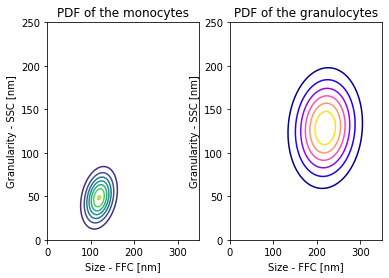

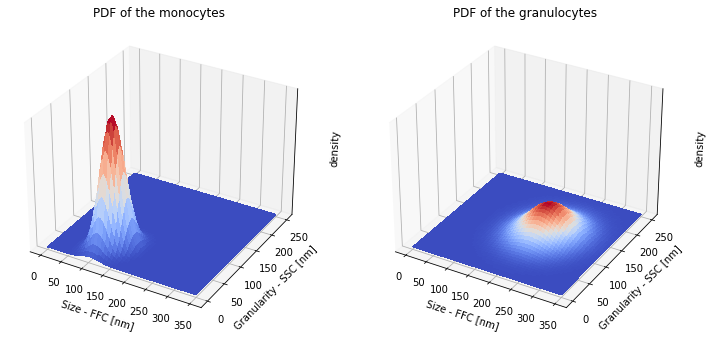

In [7]:
### Verify your results by ploting the probability density

generate_density_plots(mu_0,cov_0,mu_1,cov_1)

### Question 3. 
    - Implement your binary classifier by following the MAP binary classification rule from equation (3). 

In [8]:
from scipy.stats import multivariate_normal

def MAP_binary_classifier(mu_0,cov_0,mu_1,cov_1,x):
    """Given 
        - The parameters of the two classes mu_0,cov_0,mu_1,cov_1
        - A new feature x
    Returns
        - True if the model classifies the sample as class 1
        - False if the model classifies the sample as class 0
    """
    rv_0   = multivariate_normal(mu_0, cov_0)
    Z_0    = rv_0.pdf(x)

    rv_1   = multivariate_normal(mu_1, cov_1)
    Z_1    = rv_1.pdf(x)
    
    return Z_1>Z_0

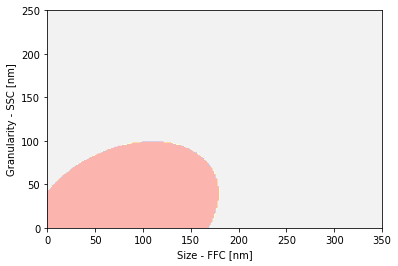

In [9]:
generate_decision_region_plots(MAP_binary_classifier,mu_0,cov_0,mu_1,cov_1)

Your classifier obtained an accuraccy of  96.8 %


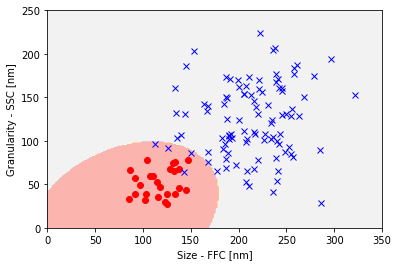

In [12]:
Y_predict = MAP_binary_classifier(mu_0,cov_0,mu_1,cov_1,X_test)
print("Your classifier obtained an accuraccy of ", score_classifier(Y_predict,Y_test)*100, "%")
generate_test_plots(X_test,Y_test,MAP_binary_classifier,mu_0,cov_0,mu_1,cov_1)

## 3. The Bayes binary classifier 

### How can we implement a Bayes version of this binary classifier? 

The Bayes classifier suggest to classify the feature vector "x" by comparing the conditional probability of the label to be monocyte given the feature vector and the conditional probability of the label to be granulocyte given the feature vector.

Mathematically, the MAP binary classifier can be written as: 
<center>$\begin{equation}d_{Bayes}(x) = \begin{cases}0, \iff P(y=0|x) > P(y=1|x)  \\1 \iff P(y=0|x) < P(y=1|x)  \end{cases} \end{equation}$</center> <div style="text-align: right"> (4) </div>

To compute the conditional probabilities in equation (4), one can use the Bayes formula: 

<center>$\begin{equation} P(y=i|x) = \frac{P(x|y=i)P(y=i)}{P(x) } = \frac{P(x|y=i)P(y=i)}{\sum_{j=0}^1 P(x|y=j)P(y=j) }, \end{equation}$</center> <div style="text-align: right"> (5)  </div>
thus the conditional probability of the label given the feature vector involves the probabilities $P(y=0)$ and $P(y=1)$, respectively the "a priori" probability of observing a monocyte and a granulocyte. 

Take a minute to compare equation (4) with equation (3) and reflect on what probabilities they compare. Notice that when $P(y=0) = P(y=1)$ the expression (3) and (4) are equivalent. 


### Question 4

    - Your colleagues from the lab tell you that when observing 125 random white blood cells, they usually find 25 monocyte and 100 granulocytes. Use this information to design a Bayes binary classifier. 

In [15]:
def Bayes_binary_classifier(mu_0,cov_0,mu_1,cov_1,x):
    """Given 
        - The parameters of the two classes mu_0,cov_0,mu_1,cov_1
        - A new feature x
    Returns
     True if the model classifies the sample as class 1
     False if the model classifies the sample as class 0
     """
    p_y_0 = 0.25/1.25
    p_y_1 = 1/1.25
    
    distr_0   = multivariate_normal(mu_0, cov_0)
    p_x_given_0    = distr_0.pdf(x)

    distr_1   = multivariate_normal(mu_1, cov_1)
    p_x_given_1    = distr_1.pdf(x)
    
    
    p_y_0_given_x = p_x_given_0*p_y_0/(p_x_given_0*p_y_0+p_x_given_1*p_y_1)
    p_y_1_given_x = p_x_given_1*p_y_1/(p_x_given_0*p_y_0+p_x_given_1*p_y_1)
    
    return p_y_1_given_x>p_y_0_given_x

Your classifier obtained an accuraccy of  99.2 %


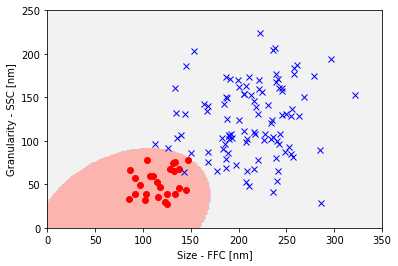

In [14]:
Y_predict = Bayes_binary_classifier(mu_0,cov_0,mu_1,cov_1,X_test)
print("Your classifier obtained an accuraccy of ", score_classifier(Y_predict,Y_test)*100, "%")
generate_test_plots(X_test,Y_test,Bayes_binary_classifier,mu_0,cov_0,mu_1,cov_1)

## 4. The "Monty Hall Problem" 

You are invited to participate in a TV game show where you can win an expensive new car. The car is parked behind one of **three closed doors**. 

<center><img src="img/monty-hall-problem.png" ...></center>
      <center> <strong>Fig 6. Monty Hall problem</strong></center>

First you are told to **choose one door**, where you believe the car is hidden. You stand in front of this door to mark your choice. 

Then the game show host, **who knows where the car is**, opens one of the remaining two doors and shows that there is **no car behind it**. Now you know the car must be either behind the door you first selected or behind the remaining closed door.

Next, the game show host **asks you if you want to change** your mind and choose the other door instead. **Do you accept this offer, or do you stay where you are?** Finally, the door you have chosen is opened, and you get the car, if it is there! Can you improve your chances by moving to that other door?

Do not rely on your intuition! Do a formal calculation! 

### Question 5: 

    - Let us denote the doors as 1, 2, and 3, where, arbitrarily, door number 1 is the one you first blocked. 
    Model the hidden place of the car as a discrete “state of nature” S that can have values 1, 2, or 3, that
    we assume to be uniform at random. 
    - Assume without loss of generality that the car is behind door 2. Model your observation of which door the
    host first opens as another discrete random variable X, which can have values 1 or 3. Calculate the
    conditional probabilities P(S=i|X=1) and P(S=i|X=3) for all the possible states i = 1,2,3. 


Write down your reasoning in this cell. Use the dollar sign to write equations. 

### Question 6:

The function *monty_simulation* takes two arguments:
    - car_is_behind_door: an integer unimorly distributed among {1,2,3}
    - swap: a boolean, if true the guest changes door, if false the guest keeps the first door he selected
The function should return the final door chosen by the guest. 

Complete the code below. 
  


In [58]:
def monty_simulation(car_is_behind_door,swap=True):
    
    first_door_selected = np.random.randint(1,3+1)
    if car_is_behind_door == first_door_selected:
        door_opened_by_presenter = np.random.choice(np.setdiff1d(np.array([1,2,3]),car_is_behind_door))
    else: 
        door_opened_by_presenter = np.setdiff1d(np.array([1,2,3]),np.append(car_is_behind_door,first_door_selected) )

    door_left = np.setdiff1d(np.array([1,2,3]),np.append(door_opened_by_presenter,first_door_selected))

    if swap == True:
        door_chosen = door_left
    else:
        door_chosen = first_door_selected

    return door_chosen

In [ ]:
 generate_monty_plot(monty_simulation,True)